# Parcial 2 Camilo Oberndorfer


# Problema 1
Sea A una matriz de tamaño $ m \times n$ con rango de $A$ igual a $n$. Entonces $A^TA$ es una matriz simetrica e invertible.

$\textbf{Simetria}:$

Para demostrar la simetria se tiene que demostrar que la transpuesta es igual a la original, por tanto hay que demostrar $(A^TA)^T = A^TA$.

Primero hay que notar que es cuadrada, esto se ve porque $A^T$ es de tamaño ($n \times m$) por lo que A^TA es de tamaño ($n \times m$)($m \times n$) = ($n \times n$)
$$(A^TA)^T = A^T A^{T^T} = A^TA$$
Por tanto $A^TA$ es simetrica

$\textbf{Invertibilidad}:$

Como A es de tamaño ($n \times m$) y tiene rango $n$ se puede hacer decomposision $QR$ con $R$ de tamaño ($n \times n$).
$$A^TA = (QR)^TQR = R^TQ^TQR = R^T(Q^TQ)R = R^TR$$

Recordar que $Q^TQ = I$ al Q ser ortogonal. 

Luego por la forma en la definicion de $R$ se sabe que esta es invertible, al igual que su transpuesta $R^T$. Por tanto tenemos que $R^TR$ es invertible. 

Concluimos que $A^TA$ es invertible.

# Problema 2
Sea $A_n$ una matriz de la siguiente forma:
$$A_n=
\begin{bmatrix}
1 & 1^2 & 1^3 & \dots & 1^n\\
2 & 2^2 & 2^3 & \dots & 2^n \\
3 & 3^2 & 3^3 & \dots & 3^n \\
\vdots & \vdots & \vdots & \ddots \\
n & n^2 & n^3 & \dots & n^n
\end{bmatrix}$$
calcular la condicion $A_n$ y plottearla como funcion de n

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def An_estimated_condition_num(dim):
    #Norma de frobenius
    frob = lambda A: np.trace(np.dot(A.T,A))**(1/2)

    #Matriz de Hilbert de orden n
    A = np.array([[i**j for j in range(1,dim+1)] for i in range(1,dim+1)])
    A_inv = np.linalg.inv(A)

    condition_num = frob(A)*frob(A_inv)

    return condition_num

Text(0, 0.5, 'Condition Number')

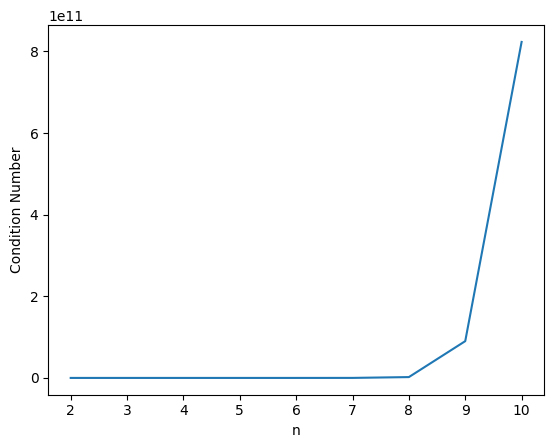

In [52]:
n=11
cond_num = [An_estimated_condition_num(i) for i in range(2,n)]
x_axis = list(range(2,n))
plt.plot(x_axis,cond_num)
plt.xlabel("n"); plt.ylabel("Condition Number")

Se ve que la matriz esta mal condicionada y que esta mal condicion aumenta cada vez mas a medida que $n$ crece. Esto se puede entender como que a mayor $n$ mas duro sera resolver un sistema de ecuaciones tomando a esta matriz como base. Tambien se nota que a medida que n crece calcularle la inversa cada vez va a ser mas dificil y menos precisa, dada a la inestabilidad que aperece en que pequeños errores (ya sea de redondeo o de otro tipo) o perturbaciones a la matriz le pueden causargrandes errores.

Principalmente se va a observar que al trabajar con esta matriz va a haber mucha inestabilidad al momento de realizar algun algoritmo.